📁 Upload your advanced stats CSV file (e.g., nba_advanced_stats_2024_2025.csv)


Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025 (1).csv
✅ Columns in file: ['Player', 'PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
🏀 Top 10 All-Around Performers (2024–25) by OBPM


,Player,VORP,WS,PER,OBPM,DBPM,BPM
23,Nikola Jokic,9.8,16.4,32.0,9.9,3.3,13.3
19,Shai Gilgeous-Alexander,8.9,16.7,30.7,8.9,2.6,11.5
45,Giannis Antetokounmpo,6.6,11.5,30.5,6.9,2.5,9.5
52,Stephen Curry,4.8,7.9,21.5,6.4,0.0,6.3
31,Tyrese Haliburton,4.9,10.4,21.8,5.7,0.2,5.8
152,Luka Doncic,2.1,3.4,23.9,5.5,1.1,6.5
150,Luka Doncic,3.9,5.9,24.1,5.5,1.2,6.7
33,LeBron James,4.7,7.7,22.7,4.9,0.7,5.6
41,Jalen Brunson,3.1,8.3,21.6,4.7,-1.3,3.3
85,Damian Lillard,3.2,7.6,21.3,4.7,-0.6,4.0


/tmp/ipython-input-3-1635334106.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OBPM', y='Player', data=df_top, palette='magma')


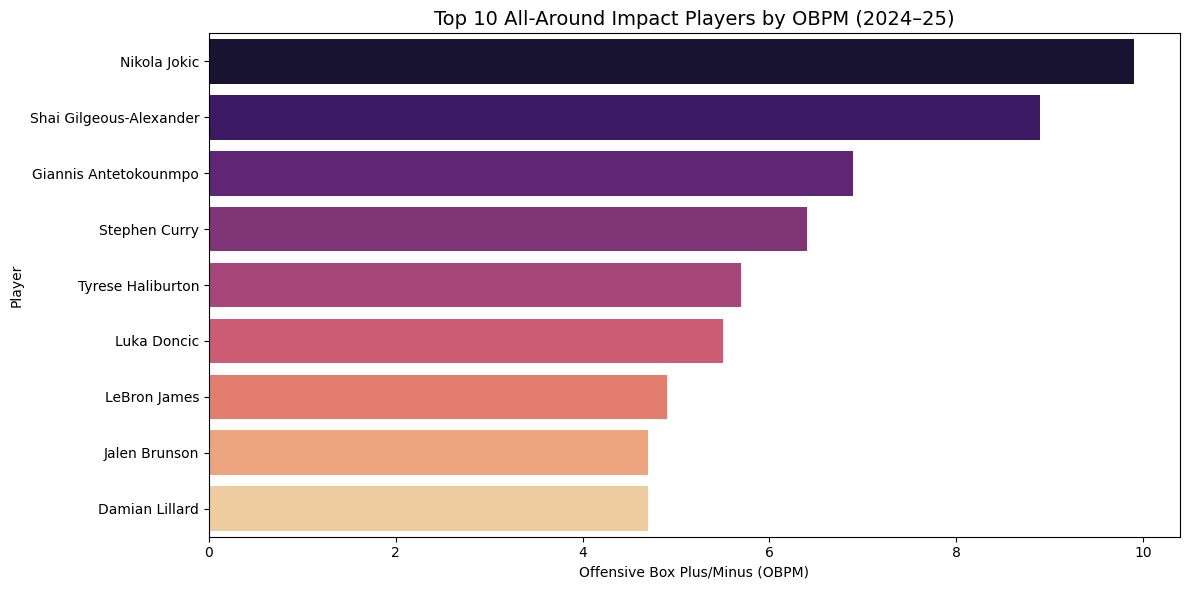

📁 Saved as top10_allaround_impact_2024_2025.csv


In [3]:
# 📓 Statline Quick Contribution Notebook
# 🎯 All-Around Impact Showcase – 2024–25 Season

# 🟦 Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# 🟦 Step 2: Upload CSV file manually
print("📁 Upload your advanced stats CSV file (e.g., nba_advanced_stats_2024_2025.csv)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 🟦 Step 3: Load and inspect data
df = pd.read_csv(filename)
print("✅ Columns in file:", df.columns.tolist())

# 🟦 Step 4: Convert relevant stats to numeric
numeric_cols = ['VORP', 'WS', 'PER', 'OBPM', 'DBPM', 'BPM']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 🟦 Step 5: Apply advanced stat filters
df_filtered = df[
    (df['VORP'] > 1.0) &
    (df['WS'] > 3.0) &
    (df['PER'] > 18)
]

# 🟦 Step 6: Sort by OBPM and get Top 10
df_top = df_filtered.sort_values(by='OBPM', ascending=False).head(10)

# 🟦 Step 7: Display table of results with fallback for team column
print("🏀 Top 10 All-Around Performers (2024–25) by OBPM")

# Try to detect valid team column automatically
possible_team_cols = ['Team', 'Tm', 'TEAM', 'team']
team_col = next((col for col in possible_team_cols if col in df_top.columns), None)

# Prepare columns to display
display_cols = ['Player', 'VORP', 'WS', 'PER', 'OBPM', 'DBPM', 'BPM']
if team_col:
    display_cols.insert(1, team_col)

# Display only available columns
available_cols = [col for col in display_cols if col in df_top.columns]
display(df_top[available_cols])

# 🟦 Step 8: Plot bar chart of OBPM
plt.figure(figsize=(12, 6))
sns.barplot(x='OBPM', y='Player', data=df_top, palette='magma')
plt.title("Top 10 All-Around Impact Players by OBPM (2024–25)", fontsize=14)
plt.xlabel("Offensive Box Plus/Minus (OBPM)")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

# 🟦 Step 9 (Optional): Save results
df_top[available_cols].to_csv("top10_allaround_impact_2024_2025.csv", index=False)
print("📁 Saved as top10_allaround_impact_2024_2025.csv")